In [6]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
sns.set_style('darkgrid')
sns.set_palette("Blues_r")
sns.set(rc={'figure.figsize':(12,6)})
sns.set_context(rc={"axes.facecolor": ".9", "axes.titlesize":16,"axes.labelsize":15,})

## Outliers

Points with very large residuals (**outliers**) should be examined: they may represent typos or interesting phenomena.

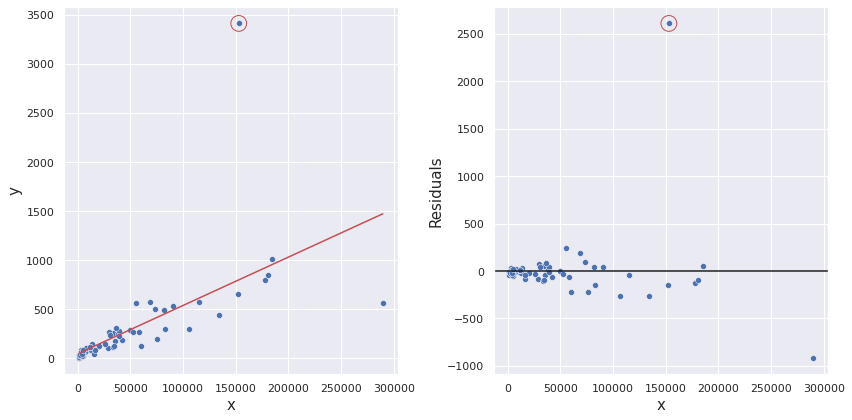

In [49]:

# Import data
election_us = pd.read_csv('../data/us_2000_election.csv')
election_florida = election_us[election_us['STATE'] == 'Florida']

# Filter candidates of interest
candidates = election_florida[['COUNTY', 'BUSH', 'BUCHANAN']].copy()
candidates.loc[:, 'BUCHANAN'] = candidates.loc[:, 'BUCHANAN'].astype(int)

# Cleaned data
data = pd.DataFrame({'COUNTY':candidates['COUNTY'], 'x':candidates['BUSH'], 'y':candidates['BUCHANAN']})


# Outliers
outlier = data[data['COUNTY'] == "Palm Beach"]

# Modeling
model = LinearRegression()
model.fit(data[['x']], data[['y']])
data['Predictions'] = model.predict(data[['x']])
data['Residuals'] = data['y'] - data['Predictions']

# Plot regression and residuals
fig, ax = plt.subplots(1,2)
sns.scatterplot(x=data['x'], y=data['y'], ax=ax[0])
sns.lineplot(x=data['x'], y=data['Predictions'], color='r', ax=ax[0])
ax[0].scatter(outlier['x'], outlier['y'], s=250, facecolors='none', edgecolors='r')

# Outliers in residuals
outlier_res = data[data['COUNTY'] == "Palm Beach"]

# Plot Residuals
sns.scatterplot(x=data['x'], y=data['Residuals'], ax=ax[1])
ax[1].scatter(outlier_res['x'], outlier_res['Residuals'], s=250, facecolors='none', edgecolors='r')
ax[1].axhline(0, color='k')
plt.tight_layout()

##  Leverage and influential points

A point whose x-value is far from the mean of the x-values has high **leverage**: it has the potential to cause a big change the regression line.

(0.825, 4.675)

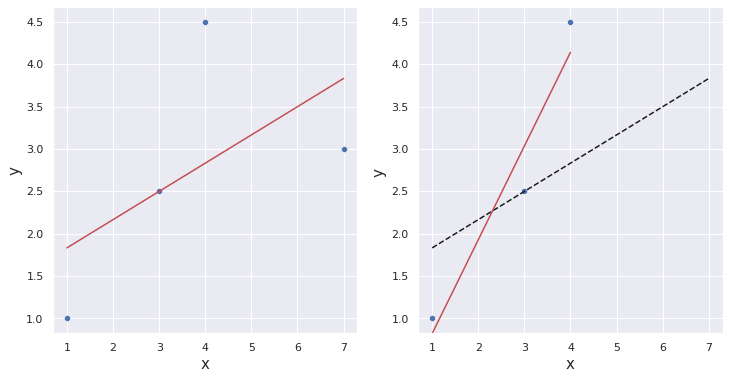

In [101]:

x, y = [1,3,4,7], [1,2.5,4.5,3]
data = pd.DataFrame({'x':x, 'y':y})

# Make the regression
model = LinearRegression()
model.fit(data[['x']], data[['y']])
data['y '] = model.predict(data[['x']])

# Plot regression line
fig, ax = plt.subplots(1,2)
sns.scatterplot(x=data['x'], y=data['y'], ax=ax[0])
sns.lineplot(x=data['x'], y=data['y '], color='r', ax=ax[0])
sns.lineplot(x=data['x'], y=data['y '], color='k',linestyle="dashed", ax=ax[1])


# Remove the high leverage point
data = data[:-1]

# Make the new regression
model = LinearRegression()
model.fit(data[['x']], data[['y']])
data['y '] = model.predict(data[['x']])

# Plot the new regression line
sns.scatterplot(x=data['x'], y=data['y'], ax=ax[1])
sns.lineplot(x=data['x'], y=data['y '], color='r', ax=ax[1])

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())

Whether it does change the line a lot ($\rightarrow$ influential point) or not can only be determined by refitting the regression whitout the point. An influential point may have a small residual (because it is influential!), so a residual plot is not helpful for this analysis.